## Import Libraries

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Load the Image

(np.float64(-0.5), np.float64(727.5), np.float64(483.5), np.float64(-0.5))

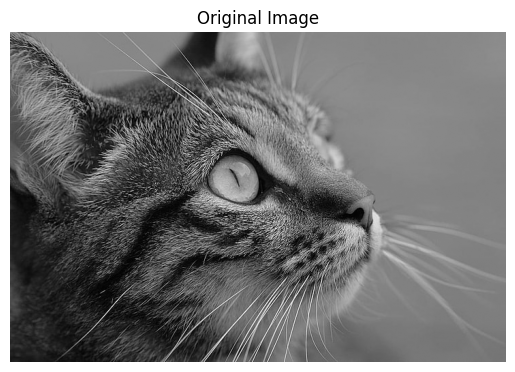

In [20]:
# Load image
img = cv2.imread(r"C:\Users\Soham M\Desktop\B.Tech\IPPR\cat-katze-black-white-black-and-white-preview.jpg", 0)

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

## Histogram for the image

C:\Users\Soham M\AppData\Local\Temp\ipykernel_15068\4278695927.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0,256])


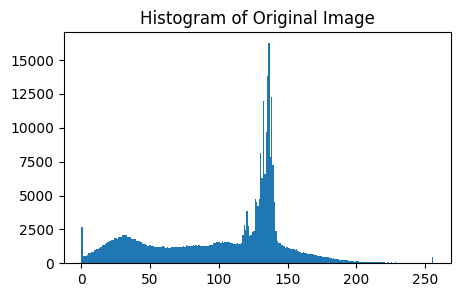

In [21]:
plt.figure(figsize=(5,3))
plt.hist(img.ravel(), 256, [0,256])
plt.title("Histogram of Original Image")
plt.show()


## Defining the function for contrast streching

In [22]:
def contrast_stretch_rs(img, r1, r2, s1, s2):
    out = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r = img[i, j]
            
            if r < r1:
                out[i, j] = (s1 / r1) * r

            elif r < r2:
                out[i, j] = s1 + (s2 - s1)/(r2 - r1) * (r - r1)

            else:
                out[i, j] = s2 + (255 - s2)/(255 - r2) * (r - r2)

    return out.astype(np.uint8)


In [23]:
r1, r2 = 100, 160
s1, s2 = 40, 210

stretched = contrast_stretch_rs(img, r1, r2, s1, s2)


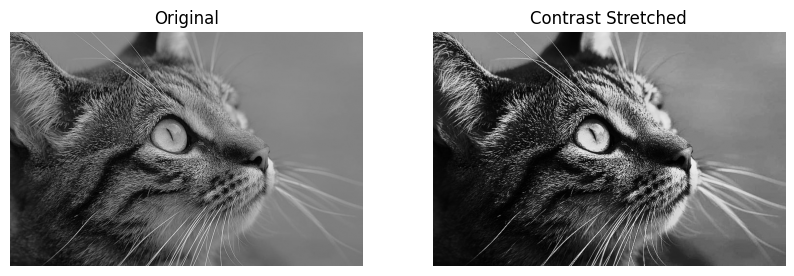

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(stretched, cmap='gray'); plt.title("Contrast Stretched"); plt.axis('off')
plt.show()


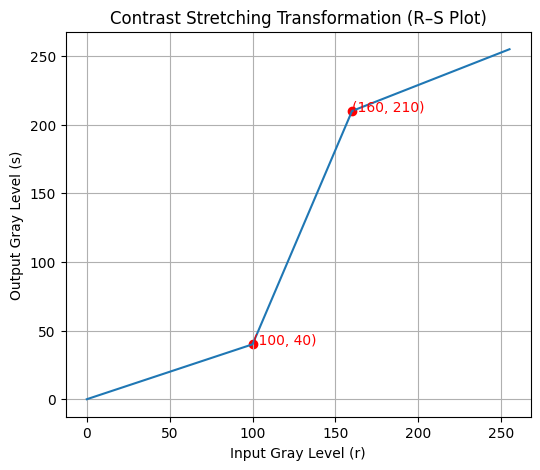

In [25]:
inputs = np.arange(256)
outputs = np.zeros(256)

for r in inputs:
    if r < r1:
        outputs[r] = (s1 / r1) * r
    elif r < r2:
        outputs[r] = s1 + (s2 - s1)/(r2 - r1) * (r - r1)
    else:
        outputs[r] = s2 + (255 - s2)/(255 - r2) * (r - r2)

plt.figure(figsize=(6,5))
plt.plot(inputs, outputs)
plt.scatter([r1, r2], [s1, s2], color='red')

plt.text(r1, s1, f"({r1}, {s1})", fontsize=10, color='red')
plt.text(r2, s2, f"({r2}, {s2})", fontsize=10, color='red')

plt.title("Contrast Stretching Transformation (R–S Plot)")
plt.xlabel("Input Gray Level (r)")
plt.ylabel("Output Gray Level (s)")
plt.grid(True)
plt.show()


## Gray Image Slicing

(np.float64(-0.5), np.float64(727.5), np.float64(483.5), np.float64(-0.5))

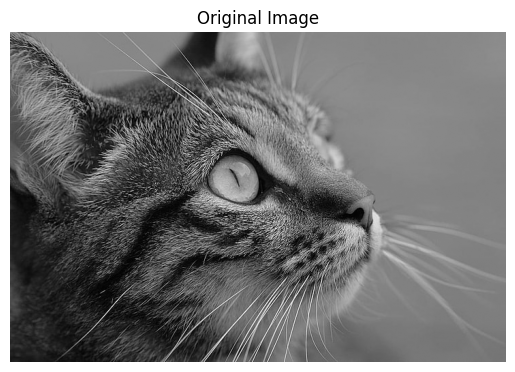

In [26]:
img = cv2.imread(r"C:\Users\Soham M\Desktop\B.Tech\IPPR\cat-katze-black-white-black-and-white-preview.jpg", 0)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

## Defining the function for gray scale slicing

In [27]:
def gray_level_slicing(img, A, B, highlight=255, background_mode=0):

    out = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            p = img[i,j]
            
            if A <= p <= B:
                out[i,j] = highlight
            else:
                if background_mode == 1:
                    out[i,j] = p
                else:
                    out[i,j] = 0
    return out


## Slicing with background removal

(np.float64(-0.5), np.float64(727.5), np.float64(483.5), np.float64(-0.5))

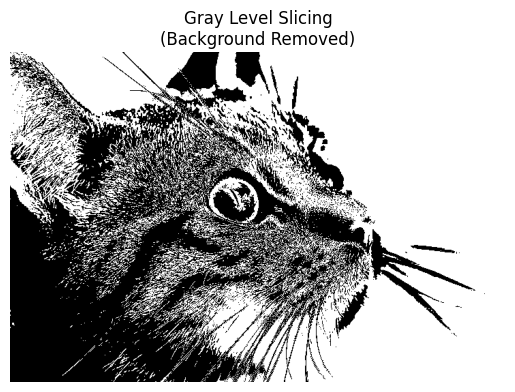

In [28]:
A, B = 80, 150
sliced1 = gray_level_slicing(img, A, B, highlight=255, background_mode=0)

plt.imshow(sliced1, cmap='gray')
plt.title("Gray Level Slicing\n(Background Removed)")
plt.axis("off")


## Slicing with preserved background

(np.float64(-0.5), np.float64(727.5), np.float64(483.5), np.float64(-0.5))

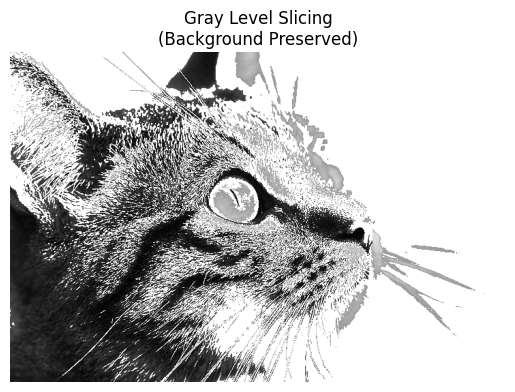

In [29]:
sliced2 = gray_level_slicing(img, A, B, highlight=255, background_mode=1)

plt.imshow(sliced2, cmap='gray')
plt.title("Gray Level Slicing\n(Background Preserved)")
plt.axis("off")


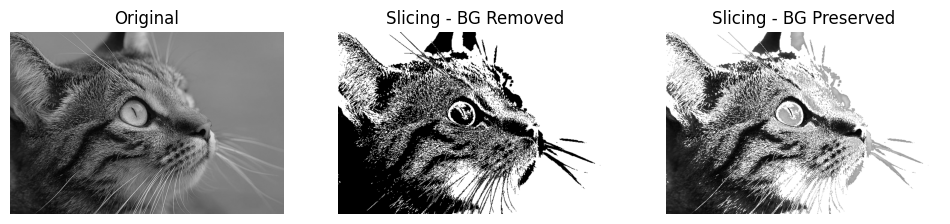

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(sliced1, cmap='gray'); plt.title("Slicing - BG Removed"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(sliced2, cmap='gray'); plt.title("Slicing - BG Preserved"); plt.axis("off")
plt.show()


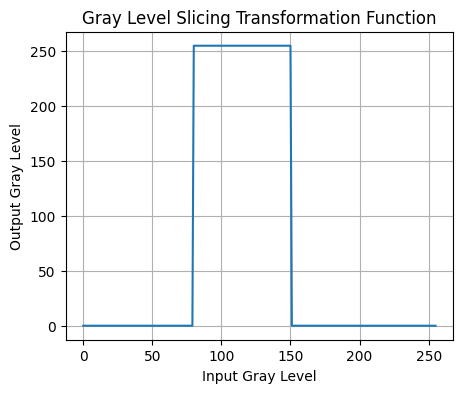

In [31]:
inputs = np.arange(256)
outputs = np.zeros(256)

for p in inputs:
    if A <= p <= B:
        outputs[p] = 255
    else:
        outputs[p] = 0  # mode-1 mapping

plt.figure(figsize=(5,4))
plt.plot(inputs, outputs)
plt.title("Gray Level Slicing Transformation Function")
plt.xlabel("Input Gray Level")
plt.ylabel("Output Gray Level")
plt.grid(True)
plt.show()


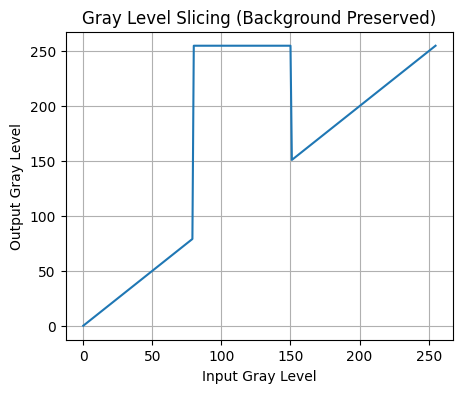

In [32]:
inputs = np.arange(256)
outputs = np.zeros(256)

for p in inputs:
    if A <= p <= B:
        outputs[p] = 255
    else:
        outputs[p] = p

plt.figure(figsize=(5,4))
plt.plot(inputs, outputs)
plt.title("Gray Level Slicing (Background Preserved)")
plt.xlabel("Input Gray Level")
plt.ylabel("Output Gray Level")
plt.grid(True)
plt.show()


(np.float64(-0.5), np.float64(727.5), np.float64(483.5), np.float64(-0.5))

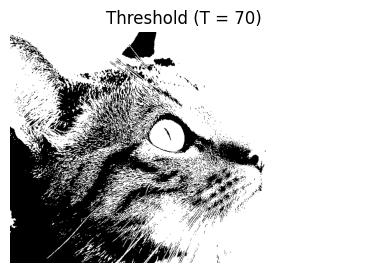

In [33]:
T = 70

binary_manual = np.where(img > T, 255, 0).astype(np.uint8)

plt.figure(figsize=(6,3))
plt.imshow(binary_manual, cmap='gray')
plt.title(f"Threshold (T = {T})")
plt.axis('off')
